<a href="https://colab.research.google.com/github/kartik2627/Machine-Learning/blob/main/featurescaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Untitled form (File responses) (1)/python Datasets/titanic (1).csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
data.shape

(891, 12)

In [6]:
data.dropna().shape

(183, 12)

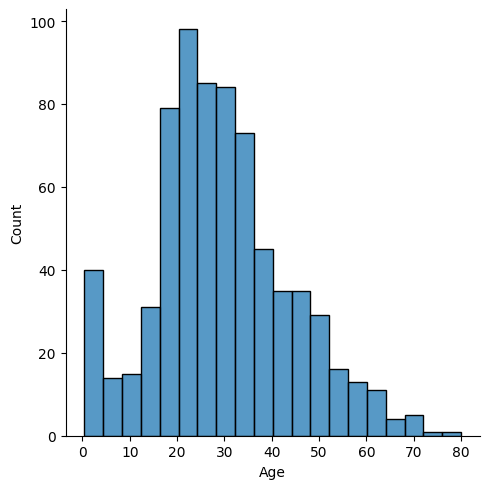

In [7]:
## mean value imputation
sns.displot(data["Age"])

<Axes: xlabel='Age', ylabel='Count'>

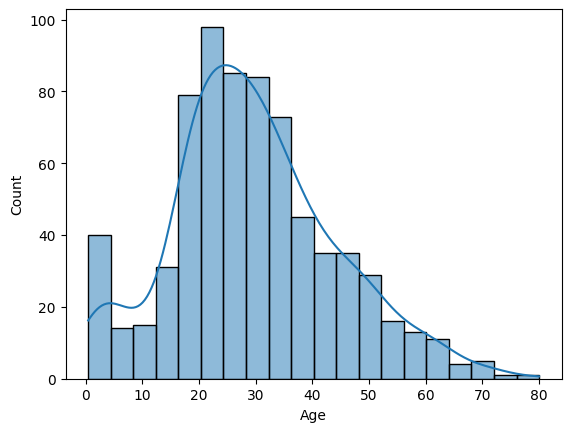

In [8]:
sns.histplot(data["Age"],kde=True)

In [9]:
data["AGE_mean"]=data["Age"].fillna(data["Age"].mean())

In [10]:
data[["AGE_mean","Age"]]

,AGE_mean,Age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [11]:
## - Median value Imputation
data["Age_median"]=data["Age"].fillna(data["Age"].median())

In [13]:
data[["AGE_mean","Age_median","Age"]]

,AGE_mean,Age_median,Age
0,22.000000,22.0,22.0
1,38.000000,38.0,38.0
2,26.000000,26.0,26.0
3,35.000000,35.0,35.0
4,35.000000,35.0,35.0
...,...,...,...
886,27.000000,27.0,27.0
887,19.000000,19.0,19.0
888,29.699118,28.0,NaN
889,26.000000,26.0,26.0


In [14]:
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AGE_mean,Age_median
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,38.0,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,62.0,62.0


In [15]:
data["Embarked"].isnull()

,Embarked
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [16]:
data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
data[data["Embarked"].notna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AGE_mean,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.000000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.000000,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.000000,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,29.699118,28.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.000000,26.0


In [18]:
mode_value=data[data["Embarked"].notna()]["Embarked"].mode()[0]

In [21]:
data["Embarked_mode"]=data["Embarked"].fillna(mode_value)

In [22]:
data[["Embarked","Embarked_mode"]]

,Embarked,Embarked_mode
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [23]:
### Handling in balance data set
import numpy as np
import pandas as pd
np.random.seed(123)
n_sample=1000
class_0_ratio=0.9
n_class_0=int(n_sample*class_0_ratio)
n_class_1=n_sample-n_class_0

In [24]:
n_class_0,n_class_1

(900, 100)

In [25]:
# create a dataframe with imbalance datset
class_0 =pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})
class_1 =pd.DataFrame({
    'feature_1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})

In [27]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [28]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [29]:
df.isnull().sum()

,0
feature_1,0
feature_2,0
target,0


In [30]:
df['target'].value_counts()

,count
target,
0,900
1,100


In [31]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [32]:
from sklearn.utils import resample
df_minority_upsample=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)


In [33]:
df_minority_upsample.shape

(900, 3)

In [35]:
df_unsample=pd.concat([df_majority,df_minority_upsample])

In [36]:
df_unsample['target'].value_counts()

,count
target,
0,900
1,900


In [38]:
import sklearn


In [39]:
from sklearn.datasets import make_classification

In [42]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=1)

In [43]:
from typing_extensions import final
df1 = pd.DataFrame(X,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
df = pd.concat([df1,df2],axis=1)
df.head()

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0


In [45]:
df['target'].value_counts()

,count
target,
0,894
1,106


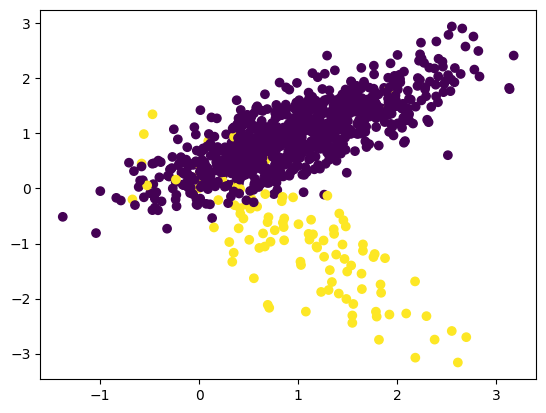

In [46]:
import matplotlib.pyplot as plt
plt.scatter(df['f1'],df['f2'],c=df['target'])

In [50]:
!pip install imblearn

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
oversample=SMOTE()
X,y=oversample.fit_resample(df.iloc[:,:-1],df.iloc[:,-1])

In [56]:
X.shape

(1788, 2)

In [57]:
y==0
print(y)

0       1
1       0
2       0
3       0
4       0
       ..
1783    1
1784    1
1785    1
1786    1
1787    1
Name: target, Length: 1788, dtype: int64


In [58]:
import numpy as np


In [59]:
lst_marks = [45,54,28,87,65,91,60,52,67]
np.quantile(lst_marks,0.25)

52.0

In [60]:
minimum,Q1,median,Q3,maximum = np.quantile(lst_marks,[0,0.25,0.5,0.75,1])
#

In [61]:
minimum,Q1,median,Q3,maximum

(28.0, 52.0, 60.0, 67.0, 91.0)

In [62]:
IQR = Q3-Q1
print(IQR)

15.0


In [63]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(lower_bound,upper_bound)

29.5 89.5


In [64]:
lst_marks = [45,54,28,87,65,91,60,52,67,100]

<Axes: >

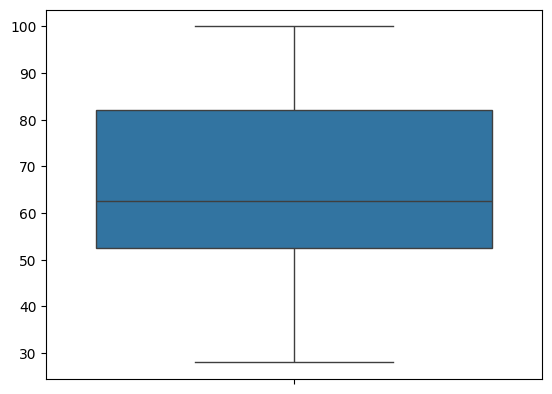

In [65]:
import seaborn as sns
sns.boxplot(lst_marks)

In [66]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [67]:
data_df = pd.DataFrame({'color':['red','blue','green','green','red','blue']})

In [68]:
data_df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [69]:
encoder = OneHotEncoder()

In [70]:
encoder.fit_transform(data_df[['color']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [72]:
encoded = encoder.fit_transform(data_df[['color']]).toarray()

In [73]:
import pandas as pd

In [75]:
encoder_df = pd.DataFrame(encoded,columns = encoder.get_feature_names_out())

In [76]:
encoder_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [77]:
encoder.transform([['green']]).toarray()

array([[0., 1., 0.]])

In [78]:
pd.concat([data_df,encoder_df],axis=1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


In [80]:
label_df=pd.concat([data_df,encoder_df],axis=1)

In [81]:
df_color = pd.DataFrame({'color':['red','blue','green','green','red','blue']})

In [82]:
df_color.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [83]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [84]:
lbl.fit_transform(df_color['color'])

array([2, 0, 1, 1, 2, 0])

In [85]:
lbl.transform([['red']])

array([2])

In [86]:
lbl.transform([['blue']])

array([0])

In [87]:
# ordinal for ranking
from sklearn.preprocessing import OrdinalEncoder

In [88]:
education_level =  pd.DataFrame({'Education':['High School','Masters','Bachelors','Masters','High School']})

In [89]:
education_level.head()

,Education
0,High School
1,Masters
2,Bachelors
3,Masters
4,High School


In [90]:
encoder = OrdinalEncoder(categories=[['High School','Masters','Bachelors']])

In [91]:
encoder.fit_transform(education_level[['Education']])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.]])

In [92]:
encoder.transform([['Masters']])

array([[1.]])

In [93]:
df = pd.DataFrame({'city':['New York','London','Paris','Tokyo','New York','Paris'],'price':[200,150,300,250,150,300]})

In [94]:
df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,150
5,Paris,300


In [95]:
df.groupby('city')['price'].mean()

,price
city,
London,150.0
New York,175.0
Paris,300.0
Tokyo,250.0


In [96]:
df['city_encoded']=df['city'].map(df.groupby('city')['price'].mean())

In [97]:
df

,city,price,city_encoded
0,New York,200,175.0
1,London,150,150.0
2,Paris,300,300.0
3,Tokyo,250,250.0
4,New York,150,175.0
5,Paris,300,300.0


In [98]:
sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
